## 该代码在kaggle中使用P100成功运行
### 链接：https://www.kaggle.com/code/czy111/baseline-taiyi-stable-diffusion

In [ ]:
## 下载huggingface的diffusers库
!pip install diffusers

In [ ]:
## 加载TaiYi Stable diffusion模型
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained(
    "IDEA-CCNL/Taiyi-Stable-Diffusion-1B-Chinese-EN-v0.1").to("cuda")


In [ ]:
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output

##对prompts里的每个prompt测试多次
def test(pipe,prompts,times):
    if not os.path.exists('images'):
        os.mkdir('images')
    for i in range(times):
        for prompt in prompts:
            image=pipe(prompt ,num_inference_steps=500,guidance_scale=10).images[0] 
            image.save(f'./images/Taiyi-Stable-Diffusion_{prompt}_{str(i)}.png')
            plt.imshow(image)
            plt.show()
        clear_output()

In [ ]:
##开始测试
prompts=[
    '一只不想上班的狗',
    '一只坐在电脑前思考的猴子',
    '一只不想努力的鲨鱼',
    '一只穿背带裤、梳中分头的公鸡',
    'An angry parrot'，
    'Van Gogh\'s oil painting sunflower',
    'A photo of a Shiba Inu dog with a backpack riding a bike.',
    'one cat and two dogs sitting on the grass',
    'a bird scaring a scarecrow',
    '一只困惑的猫',
    '一条开心的咸鱼',
    '小桥流水人家',
    '努力翻身的意大利炮',
    '空中飞行的猪',
    '长着翅膀的独角兽',
]
test(pipe,prompts,5)

  0%|          | 0/50 [00:00<?, ?it/s]

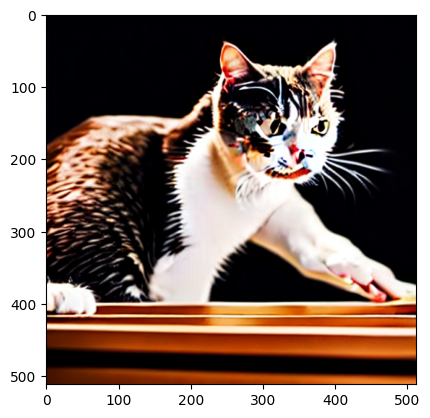

In [16]:
## 一个示例
prompt='吃过桥米线的猫'
image=pipe(prompt ,guidance_scale=30).images[0] 
plt.imshow(image)
plt.show()